In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime



# set the style of the plots
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
# Convert dates to datetime format
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

In [5]:
# Preview datasets
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region SignupDate
0      C0001    Lawrence Carroll  South America 2022-07-10
1      C0002      Elizabeth Lutz           Asia 2022-02-13
2      C0003      Michael Rivera  South America 2024-03-07
3      C0004  Kathleen Rodriguez  South America 2022-10-09
4      C0005         Laura Weber           Asia 2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272   

## Exploratory Data Analysis

In [6]:
# Check for missing values

print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
# Descriptive statistics summary
print("Transactions:\n", transactions.describe())
print("Products:\n", products.describe())
print("Customers:\n", customers.describe())

Transactions:
                      TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                              NaN     1.117981   493.144478   140.73639
Products:
             Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
Customers:
                 SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26

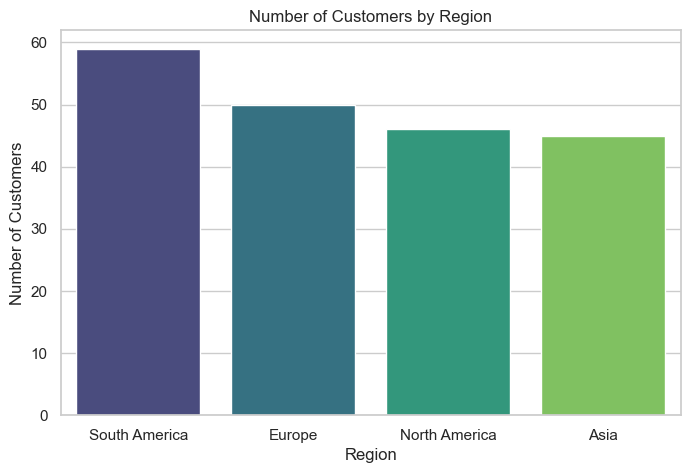

In [8]:
# 3. Customers by Region
region_counts = customers["Region"].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Number of Customers by Region")
plt.ylabel("Number of Customers")
plt.xlabel("Region")
plt.show()

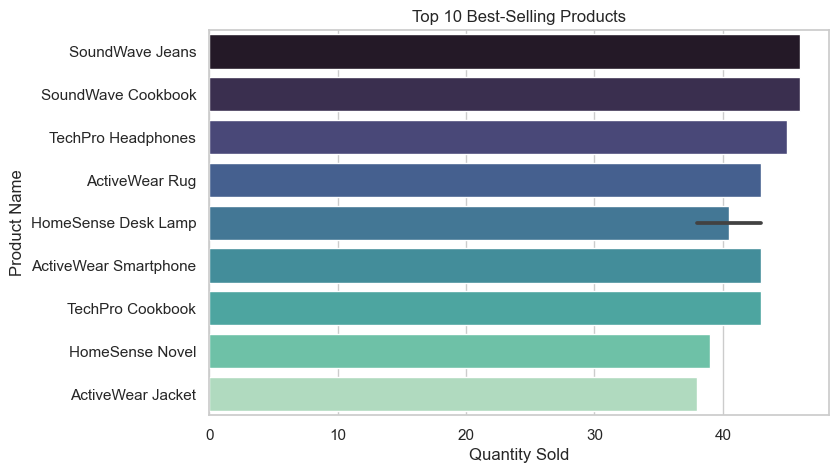

In [9]:
# 4. Top Selling Products
top_products = (
    transactions.groupby("ProductID")["Quantity"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_products = pd.merge(
    top_products, products[["ProductID", "ProductName"]], on="ProductID"
)
plt.figure(figsize=(8, 5))
sns.barplot(x="Quantity", y="ProductName", data=top_products, palette="mako")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()

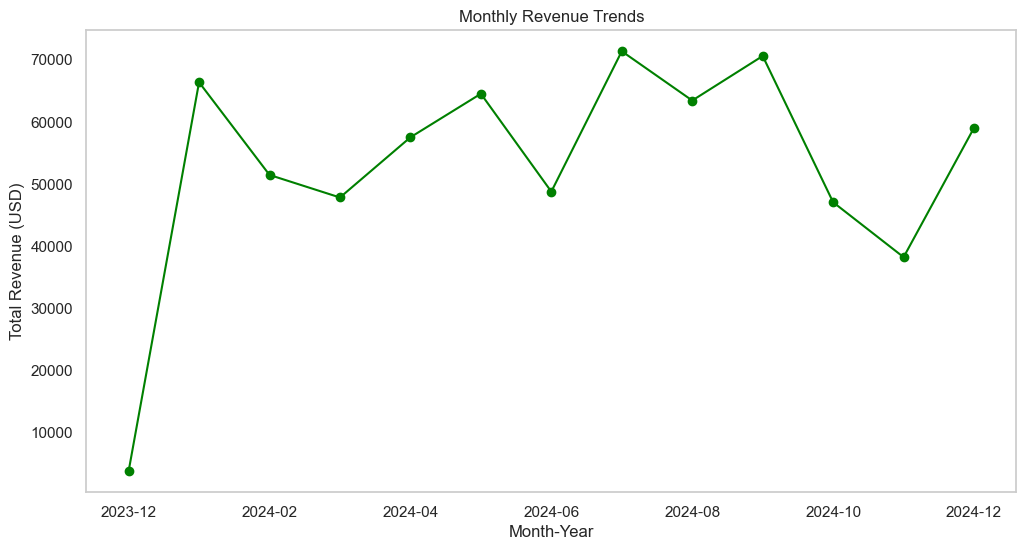

In [10]:
# 5. Revenue Trends Over Time
transactions["YearMonth"] = transactions["TransactionDate"].dt.to_period("M")
monthly_revenue = transactions.groupby("YearMonth")["TotalValue"].sum()
monthly_revenue.index = monthly_revenue.index.astype(str)
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind="line", marker="o", color="green")
plt.title("Monthly Revenue Trends")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue (USD)")
plt.grid()
plt.show()

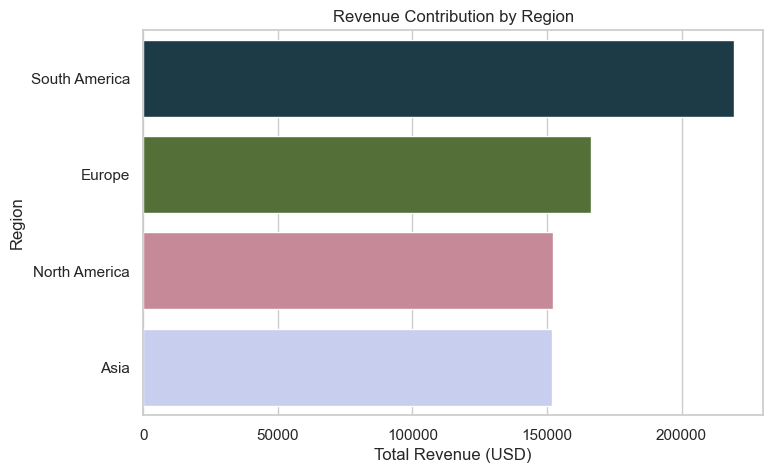

In [11]:
# 6. Revenue Contribution by Region
region_revenue = (
    transactions.merge(customers, on="CustomerID")
    .groupby("Region")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.values, y=region_revenue.index, palette="cubehelix")
plt.title("Revenue Contribution by Region")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Region")
plt.show()

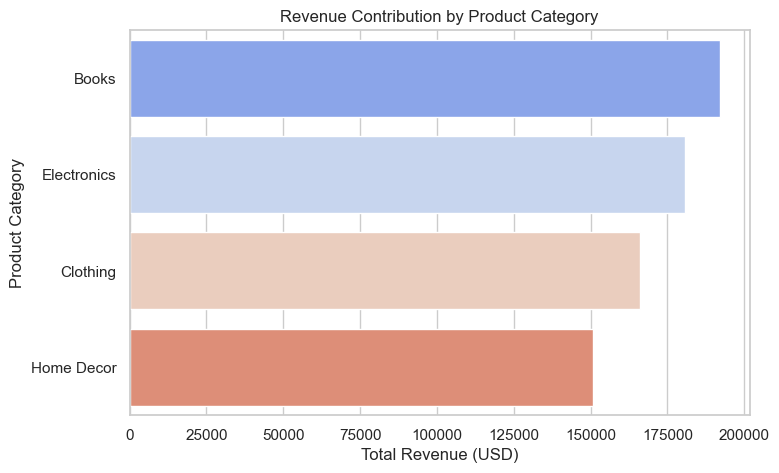

In [12]:
# 7. Product Categories by Revenue
category_revenue = (
    transactions.merge(products, on="ProductID")
    .groupby("Category")["TotalValue"]
    .sum()
    .sort_values(ascending=False)
)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette="coolwarm")
plt.title("Revenue Contribution by Product Category")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Category")
plt.show()

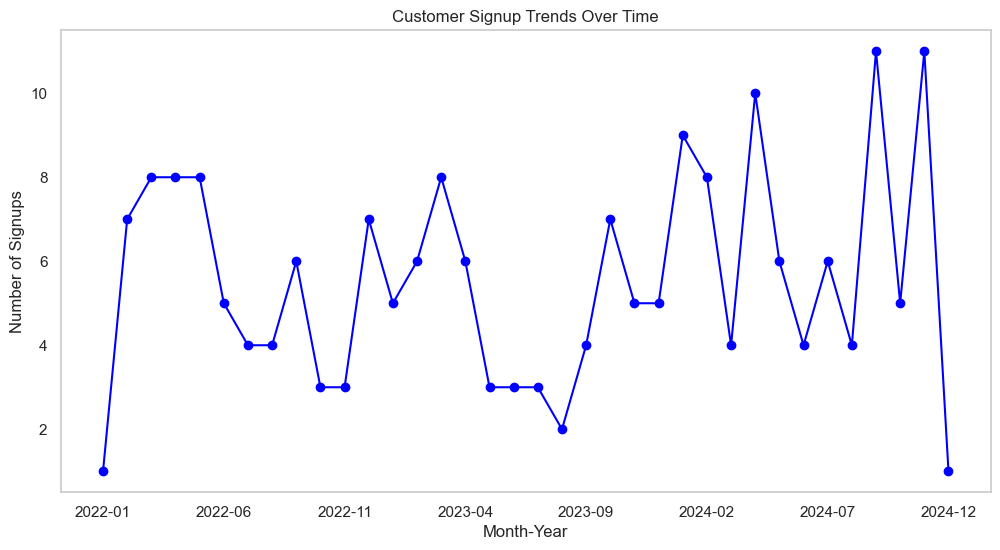

In [13]:
# 8. Signup Trends Over Time
signup_trends = customers.groupby(customers["SignupDate"].dt.to_period("M")).size()
signup_trends.index = signup_trends.index.astype(str)
plt.figure(figsize=(12, 6))
signup_trends.plot(kind="line", marker="o", color="blue")
plt.title("Customer Signup Trends Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Signups")
plt.grid()
plt.show()